# Clinical and Adverse Events

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../curated data/SA_2020-09-04.csv')
df.head()

C:\Users\Ridha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,14,15,18,19,25,50) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STUDYID,DOMAIN,USUBJID,SASEQ,SATERM,SAMODIFY,SALLT,SALLTCD,SADECOD,SAPTCD,...,VISITNUM,VISIT,VISITDY,EPOCH,SADY,SASTDY,SAENDY,SADUR,SAEVINTX,SACDSTDY
0,EJPDEJ,SA,8027,20,stoolbla,Black stools,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TREATMENT,1.0,-8.0,NaN,NaN,NaN,NaN
1,EJPDEJ,SA,8027,15,throata,Sore throat,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TREATMENT,1.0,-8.0,NaN,NaN,NaN,NaN
2,EJPDEJ,SA,8027,26,othera,Other clinical signs,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TREATMENT,1.0,-8.0,NaN,NaN,NaN,NaN
3,EJPDEJ,SA,8027,28,conja,Conjunctivitis,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TREATMENT,1.0,-8.0,NaN,NaN,NaN,NaN
4,EJPDEJ,SA,8027,29,rasha,Red rash (eruption),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TREATMENT,1.0,-8.0,NaN,NaN,NaN,NaN


In [3]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161358 entries, 0 to 2161357
Data columns (total 52 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   STUDYID   2161358 non-null  object 
 1   DOMAIN    2161358 non-null  object 
 2   USUBJID   2161358 non-null  int64  
 3   SASEQ     2161358 non-null  int64  
 4   SATERM    2161358 non-null  object 
 5   SAMODIFY  665925 non-null   object 
 6   SALLT     0 non-null        float64
 7   SALLTCD   0 non-null        float64
 8   SADECOD   0 non-null        float64
 9   SAPTCD    0 non-null        float64
 10  SAHLT     0 non-null        float64
 11  SAHLTCD   0 non-null        float64
 12  SAHLGT    0 non-null        float64
 13  SAHLGTCD  0 non-null        float64
 14  SACAT     207329 non-null   object 
 15  SASCAT    33 non-null       object 
 16  SAPRESP   2160764 non-null  object 
 17  SAOCCUR   1377791 non-null  object 
 18  SASTAT    781302 non-null   object 
 19  SAREASND  781302 non-

The features are : 
    
**STUDYID** : Study Identifier

**DOMAIN** : Domain Abbreviation

**USUBJID** : Unique Subject Identifier

**SASEQ** : Observation Sequence Number

**SATERM** : Reported Term for the Event

**SAMODIFY** : Modified Reported Term for the Event

**SALLT** : Lowest Level Term => No values

**SALLTCD** : Lowest Level Term Code => No values

**SADECOD** : Standardized Term => No values

**SAPTCD** : Preferred Term Code => No values

**SAHLT** : High Level Term  => No values

**SAHLTCD** : High Level Term Code  => No values

**SAHLGT** : High Level Group Term  => No values

**SAHLGTCD** : High Level Group Term Code  => No values

**SACAT** : Category for Observation  

**SASCAT** : SubCategory for Observation 

**SAPRESP** : Pre-Specified Observation

**SAOCCUR** : Observation Occurrence

**SASTAT** : Completion Status

**SAREASND** : Reason Not Done

**SABODSYS** : Body System or Organ Class  => No values

**SABDSYCD** : Body System or Organ Class Code  => No values

**SASOC** : Primary System Organ Class  => No values

**SASOCCD** : Primary System Organ Class Code  => No values

**SALOC** : Location of Event  => No values

**SASEV** : Severity/Intensity

**SASER** : Serious Event  => No values

**SAACN** : Action Taken with Study Treatment  => No values

**SAACNOTH** : Other Action Taken  => No values

**SAREL** : Causality  => No values

**SARELNST** : Relationship to Non-Study Treatment  => No values

**SAPATT** : Pattern of Event  => No values

**SAOUT** : Outcome of Event  => No values

**SASCAN** : Involves Cancer  => No values

**SASCONG** : Congenital Anomaly or Birth Defect  => No values

**SASDISAB** : Persist or Signif Disability/Incapacity  => No values

**SASDTH** : Results in Death  => No values

**SASHOSP** : Requires or Prolongs Hospitalization  => No values

**SASLIFE** : Is Life Threatening  => No values

**SASOD** :  Occurred with Overdose  => No values

**SASMIE** : Other Medically Important Serious Event  => No values

**SACONTRT** : Concomitant or Additional Trtmnt Given  => No values

**VISITNUM** : Visit Number

**VISIT** : Visit Name  => No values
 
**VISITDY** : Planned Study Day of Visit  => No values

**EPOCH** : Epoch

**SADTC** : Date/Time of Observation/Collection

**SASTDTC** : Start Date/Time of Observation

**SAENDTC** : End Date/Time of Observation

**SADY** : Study Day of Observation/Collection

**SASTDY** : Study Day of Start of Observation

**SAENDY** : Study Day of End of Observation  => No values

**SADUR** : Duration of Observation  => No values

**SAEVINTX** : Evaluation Interval Text

**SACDSTDY** : Contributor-Reported Study Day  => No values

In [4]:
features_no_values = ['SALLT', 'SALLTCD', 'SADECOD', 'SAPTCD', 'SAHLT','SAHLTCD','SAHLGT',
                      'SAHLGTCD','SABODSYS', 'SABDSYCD', 'SASOC', 'SASOCCD','SALOC',
                      'SASER', 'SAACNOTH','SAREL','SAPATT','SAOUT','SASCAN',
                      'SASDTH', 'SASLIFE', 'SASOD', 'SAACN','SARELNST','SASCONG',
                      'SASDISAB','SASHOSP','SASMIE','SACONTRT', 'VISIT','VISITDY','SAENDY','SADUR','SACDSTDY']

df.drop(columns=features_no_values,inplace=True)

In [5]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161358 entries, 0 to 2161357
Data columns (total 18 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   STUDYID   2161358 non-null  object 
 1   DOMAIN    2161358 non-null  object 
 2   USUBJID   2161358 non-null  int64  
 3   SASEQ     2161358 non-null  int64  
 4   SATERM    2161358 non-null  object 
 5   SAMODIFY  665925 non-null   object 
 6   SACAT     207329 non-null   object 
 7   SASCAT    33 non-null       object 
 8   SAPRESP   2160764 non-null  object 
 9   SAOCCUR   1377791 non-null  object 
 10  SASTAT    781302 non-null   object 
 11  SAREASND  781302 non-null   object 
 12  SASEV     5315 non-null     object 
 13  VISITNUM  1741 non-null     float64
 14  EPOCH     1962874 non-null  object 
 15  SADY      2155214 non-null  float64
 16  SASTDY    76703 non-null    float64
 17  SAEVINTX  110612 non-null   object 
dtypes: float64(3), int64(2), object(13)
memory usage: 296.8+ MB


In [6]:
len(df[df.duplicated()])

0

### Correlation Matrix

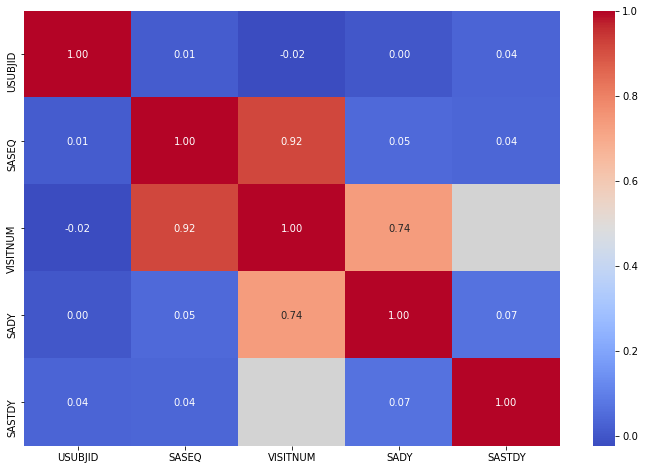

In [7]:
plt.figure(figsize=(12, 8))
corr = df.corr()
color = plt.get_cmap('coolwarm')
color.set_bad('lightgrey') 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns ,annot=True, fmt=".2f", cmap = color)
plt.show()

### Study identifier

We first look the number of records we have per study.

In [8]:
stdy_id_count = df['STUDYID'].value_counts()
stdy_id_count.sort_index(inplace = True)
stdy_id_count

EJPDEJ    531832
EOPNOJ    134526
EORKWS      1741
EQJJGF    245256
ERFCVU    428602
EUZJTB    819401
Name: STUDYID, dtype: int64

In [75]:
sum(stdy_id_count)

2161358

We then look at the number of people per study.

In [9]:
stdy_subid_count = df.groupby('STUDYID').USUBJID.nunique()
stdy_subid_count.sort_index(inplace = True)
stdy_subid_count

STUDYID
EJPDEJ    2301
EOPNOJ     147
EORKWS      17
EQJJGF    1909
ERFCVU    2717
EUZJTB    1875
Name: USUBJID, dtype: int64

In [10]:
sum(stdy_subid_count)

8966

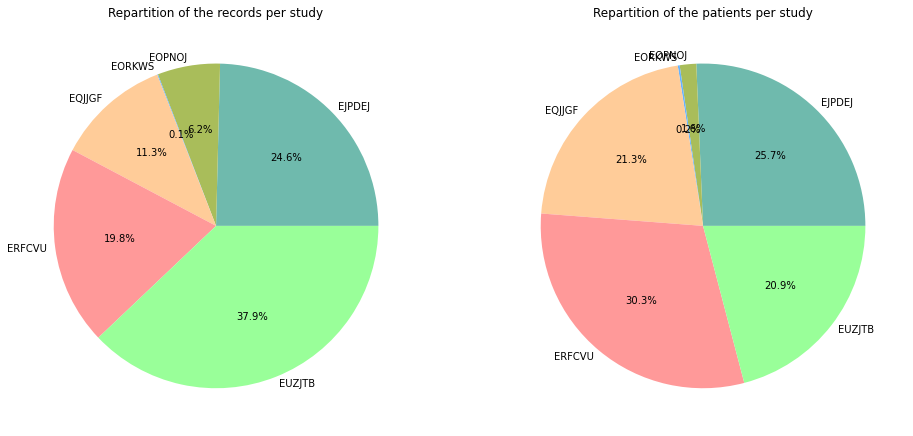

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

colors = ["#6FBAaD",'#A9BD5A', '#66b3ff', '#ffcc99','#ff9999','#99ff99', "#ffb266"]

ax1.pie(stdy_id_count.values,labeldistance=1.05, colors=colors, labels=stdy_id_count.index, autopct='%1.1f%%',
          startangle=0)

ax1.set_title("Repartition of the records per study")


ax2.pie(stdy_subid_count.values, labeldistance=1.05, colors=colors, labels=stdy_subid_count.index, autopct='%1.1f%%',
          startangle=0)

ax2.set_title("Repartition of the patients per study")

plt.show()

###  Domain abreviation 

In [12]:
df['DOMAIN'].value_counts()

SA    2161358
Name: DOMAIN, dtype: int64

### Unique Subject Identifier for a study

In [13]:
df['USUBJID'].value_counts()

5961    5619
3134    3774
3760    3499
1225    3453
2482    3377
        ... 
3511      19
964       19
5831       1
6786       1
1655       1
Name: USUBJID, Length: 8966, dtype: int64

### Observation Sequence Number

In [14]:
df['SASEQ'].value_counts()

1       8966
19      8963
5       8963
12      8963
11      8963
        ... 
4931       1
4930       1
5429       1
4925       1
5034       1
Name: SASEQ, Length: 5619, dtype: int64

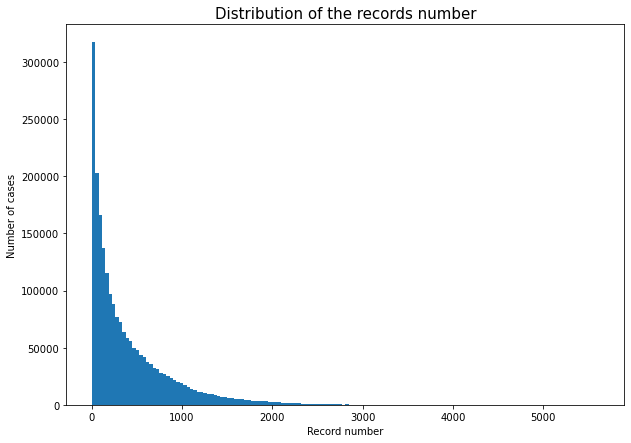

In [15]:
fig, ax = plt.subplots(figsize=(10,7))

plt.hist(df['SASEQ'], bins = 150)
ax.set_title("Distribution of the records number",size=15)
ax.set_xlabel('Record number')
ax.set_ylabel('Number of cases')
#plt.yscale('log')
plt.show()

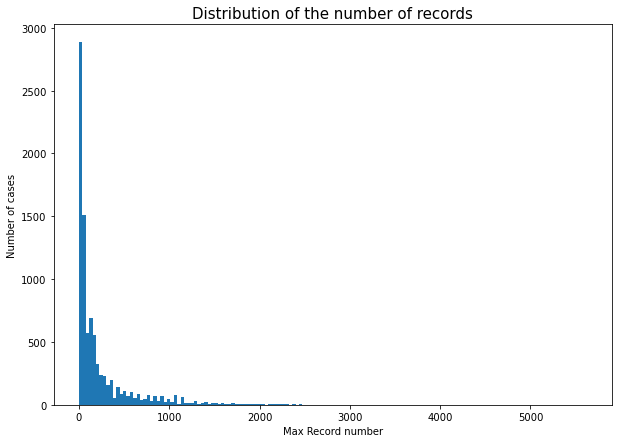

In [16]:
df_max_seq_nbr = df.groupby('USUBJID').SASEQ.max()

fig, ax = plt.subplots(figsize=(10,7))

plt.hist(df_max_seq_nbr, bins = 150)
ax.set_title("Distribution of the number of records",size=15)
ax.set_xlabel('Max Record number')
ax.set_ylabel('Number of cases')
#plt.yscale('log')
plt.show()

### Reported Term for the Event

In [17]:
len(df['SATERM'].value_counts())

603

In [18]:
df['SATERM'] = df['SATERM'].str.lower()
df['SATERM'].value_counts().head(10)

hiccups         59514
cough           49472
diarrhoea       48442
headache        48030
vomiting        46565
anorexia        46117
nausea          43388
jaundice        37515
red eyes        35950
stomach pain    35843
Name: SATERM, dtype: int64

In [19]:
len(df['SATERM'].value_counts())

572

In [20]:
603 - 572

31

By lower casing the SATERM we group terms that were equivalent together and reduce by 31 terms.

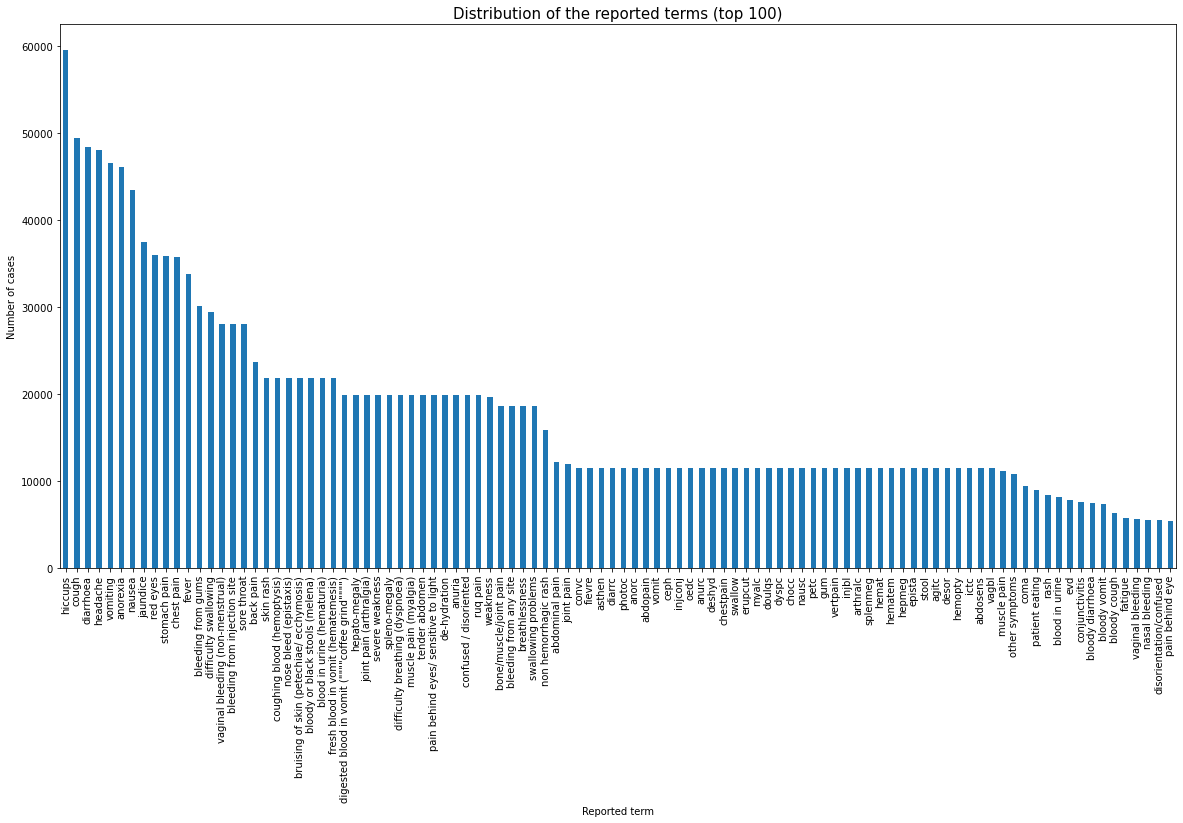

In [21]:
fig, ax = plt.subplots(figsize=(20,10))

df['SATERM'].value_counts()[:100].plot(kind ="bar")

ax.set_title("Distribution of the reported terms (top 100)",size=15)
ax.set_xlabel('Reported term')
ax.set_ylabel('Number of cases')

plt.show()

In [22]:
df_term_id_count = df.groupby('SATERM').USUBJID.nunique().sort_values(ascending=False)
df_term_id_count.head()

SATERM
hiccups      7228
evd          6661
headache     6515
diarrhoea    6515
fever        6512
Name: USUBJID, dtype: int64

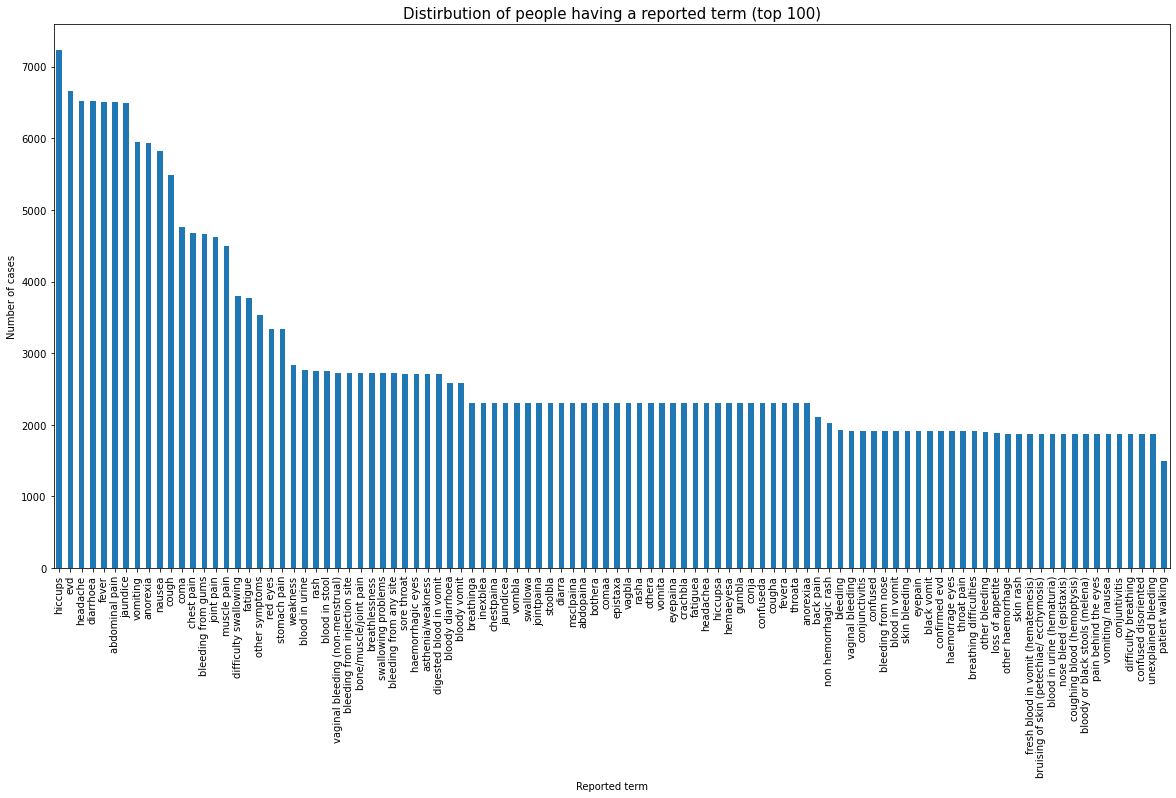

In [23]:
fig, ax = plt.subplots(figsize=(20,10))

df_term_id_count[:100].plot(kind ="bar")

ax.set_title("Distirbution of people having a reported term (top 100)",size=15)
ax.set_xlabel('Reported term')
ax.set_ylabel('Number of cases')

plt.show()

Let's look at the evd reported event more closely. 

In [24]:
df_evd = df[df['SATERM'] == 'evd']
df_evd.head()

,STUDYID,DOMAIN,USUBJID,SASEQ,SATERM,SAMODIFY,SACAT,SASCAT,SAPRESP,SAOCCUR,SASTAT,SAREASND,SASEV,VISITNUM,EPOCH,SADY,SASTDY,SAEVINTX
532123,EOPNOJ,SA,8952,47,evd,NaN,MEDICAL HISTORY,NaN,Y,Y,NaN,NaN,NaN,NaN,BASELINE,1.0,-10.0,NaN
533098,EOPNOJ,SA,6013,47,evd,NaN,MEDICAL HISTORY,NaN,Y,Y,NaN,NaN,NaN,NaN,BASELINE,1.0,-4.0,NaN
535555,EOPNOJ,SA,3816,47,evd,NaN,MEDICAL HISTORY,NaN,Y,Y,NaN,NaN,NaN,NaN,BASELINE,1.0,-2.0,NaN
536609,EOPNOJ,SA,8167,47,evd,NaN,MEDICAL HISTORY,NaN,Y,Y,NaN,NaN,NaN,NaN,BASELINE,1.0,-7.0,NaN
536837,EOPNOJ,SA,1776,47,evd,NaN,MEDICAL HISTORY,NaN,Y,Y,NaN,NaN,NaN,NaN,BASELINE,1.0,-1.0,NaN


In [25]:
len(df_evd)

7805

In [26]:
df_evd['USUBJID'].nunique()

6661

In [27]:
df_evd['EPOCH'].value_counts()

TREATMENT    1926
BASELINE      147
Name: EPOCH, dtype: int64

We can have several reported evd per patient. 

In [28]:
temp = df_evd.groupby(['USUBJID']).SASEQ.count() > 2
id_several_seq = temp.index[temp.values].values

df_evd_several_seq = df_evd[df_evd.USUBJID.isin(id_several_seq)].set_index(['USUBJID','SASEQ'])
df_evd_several_seq.head(15)

STUDYID DOMAIN SATERM SAMODIFY            SACAT SASCAT SAPRESP  \
USUBJID SASEQ                                                                  
8315    22     ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
        2      ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
        1      ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
6676    2      ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
        1      ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
        22     ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
4160    1      ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
        91     ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
        21     ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
8875    22     ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
        1      ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
        2      ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
1054    2      ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
        22     ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   
        1      ERFCVU     SA    evd      NaN  MEDICAL HISTORY    NaN       Y   

              SAOCCUR    SASTAT              SAREASND SASEV  VISITNUM EPOCH  \
USUBJID SASEQ                                                                 
8315    22          Y       NaN                   NaN   NaN       NaN   NaN   
        2           Y       NaN                   NaN   NaN       NaN   NaN   
        1           Y       NaN                   NaN   NaN       NaN   NaN   
6676    2           Y       NaN                   NaN   NaN       NaN   NaN   
        1           Y       NaN                   NaN   NaN       NaN   NaN   
        22        NaN  NOT DONE  BLANK IN RAW DATASET   NaN       NaN   NaN   
4160    1           Y       NaN                   NaN   NaN       NaN   NaN   
        91          Y       NaN                   NaN   NaN       NaN   NaN   
        21          Y       NaN                   NaN   NaN       NaN   NaN   
8875    22          Y       NaN                   NaN   NaN       NaN   NaN   
        1           Y       NaN                   NaN   NaN       NaN   NaN   
        2           Y       NaN                   NaN   NaN       NaN   NaN   
1054    2           Y       NaN                   NaN   NaN       NaN   NaN   
        22          Y       NaN                   NaN   NaN       NaN   NaN   
        1           Y       NaN                   NaN   NaN       NaN   NaN   

               SADY  SASTDY SAEVINTX  
USUBJID SASEQ                         
8315    22      1.0    -1.0      NaN  
        2       NaN     1.0      NaN  
        1       NaN     3.0      NaN  
6676    2       NaN   -42.0      NaN  
        1       NaN    -9.0      NaN  
        22      1.0     NaN      NaN  
4160    1       NaN   -33.0      NaN  
        91      6.0    -7.0      NaN  
        21      1.0    -2.0      NaN  
8875    22      1.0   -19.0      NaN  
        1       NaN    -1.0      NaN  
        2       NaN    -6.0      NaN  
1054    2       NaN     7.0      NaN  
        22      1.0    -4.0      NaN  
        1       NaN    -1.0      NaN

In [29]:
df_evd_several_seq['STUDYID'].value_counts()

ERFCVU    459
EUZJTB      6
Name: STUDYID, dtype: int64

In [30]:
df_evd_several_seq['EPOCH'].value_counts()

TREATMENT    6
Name: EPOCH, dtype: int64

They mainly come from the same study ERFCVU.

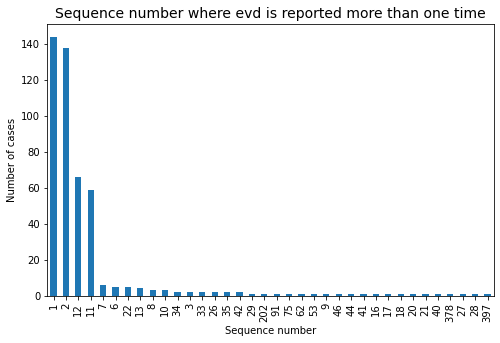

In [31]:
fig, ax = plt.subplots(figsize=(8,5))

df_evd_several_seq.reset_index()['SASEQ'].value_counts().plot(kind= 'bar')

ax.set_title("Sequence number where evd is reported more than one time",size=14)
ax.set_xlabel('Sequence number')
ax.set_ylabel('Number of cases')

plt.show()

We ask ourselves after how much time is someone declared evd ? 

In terms of observations :

In [32]:
df_evd_seq_stdy = df_evd.groupby(['SASEQ','STUDYID']).USUBJID.count().unstack(fill_value=0)
df_evd_seq_stdy['Total'] = df_evd_seq_stdy.apply(sum,axis=1)
df_evd_seq_stdy[df_evd_seq_stdy['Total'] != 1]
df_evd_seq_stdy.sort_values(by = 'Total', ascending = False, inplace= True)
df_evd_seq_stdy.head()
#['SASEQ'].value_counts().head(30)

STUDYID,EOPNOJ,EORKWS,EQJJGF,ERFCVU,EUZJTB,Total
SASEQ,,,,,,
1,0,0,1732,915,3,2650
20,0,0,1,718,0,719
9,0,0,0,681,0,681
10,0,0,0,633,0,633
33,0,0,0,1,556,557


In [33]:
total_evd = sum(df_evd_seq_stdy['Total'])

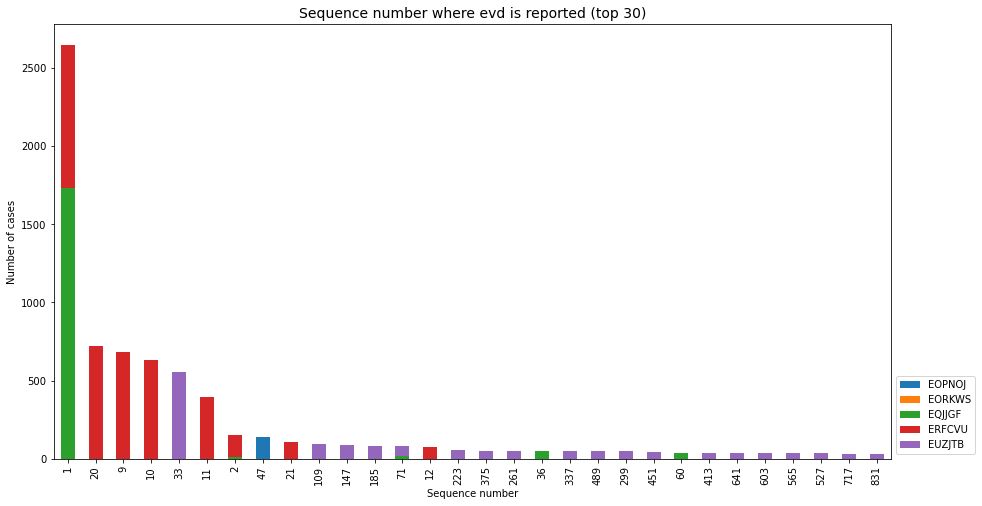

In [34]:
fig, ax = plt.subplots(figsize=(15,8))

df_evd_seq_stdy[:30].drop(columns=['Total']).plot(kind='bar',stacked=True, ax=ax)

plt.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.set_title("Sequence number where evd is reported (top 30)",size=14)
ax.set_xlabel('Sequence number')
ax.set_ylabel('Number of cases')

plt.show()

We can see that a big majority is reported the first day in two studies EQJJGF and ERFCVU. For the others they are reported after several sequence numbers and are heavily depedent of the study.

Let's see now in terms of days. 

In [35]:
df_evd_day_stdy = df_evd.groupby(['SADY','STUDYID']).USUBJID.count().unstack(fill_value=0)
df_evd_day_stdy['Total'] = df_evd_day_stdy.apply(sum,axis=1)
df_evd_day_stdy.sort_values(by='Total',ascending = False).head(10)
total_evd_id = sum(df_evd_day_stdy['Total'])
df_evd_day_stdy['Percentage'] = df_evd_day_stdy['Total'] / total_evd_id
df_evd_day_stdy.sort_values(by='Total',ascending = False).head(10)

STUDYID,EQJJGF,EOPNOJ,EORKWS,ERFCVU,Total,Percentage
SADY,,,,,,
1.0,1723,147,3,2707,4580,0.955162
2.0,0,0,10,0,10,0.002086
-41879.0,9,0,0,0,9,0.001877
-41899.0,9,0,0,0,9,0.001877
-41876.0,7,0,0,0,7,0.001460
-41900.0,7,0,0,0,7,0.001460
-239.0,7,0,0,0,7,0.001460
-41870.0,6,0,0,0,6,0.001251
-41877.0,6,0,0,0,6,0.001251


On 95 % of the cases of EVD it's reported the first day. 

### Modified Reported Term for the Event

In [36]:
df['SAMODIFY'].isna().sum() / len(df)

0.6918950955834249

69 % of the data for this feature is missing we need to reduce this percentage.

In [37]:
df['SAMODIFY'].nunique()

80

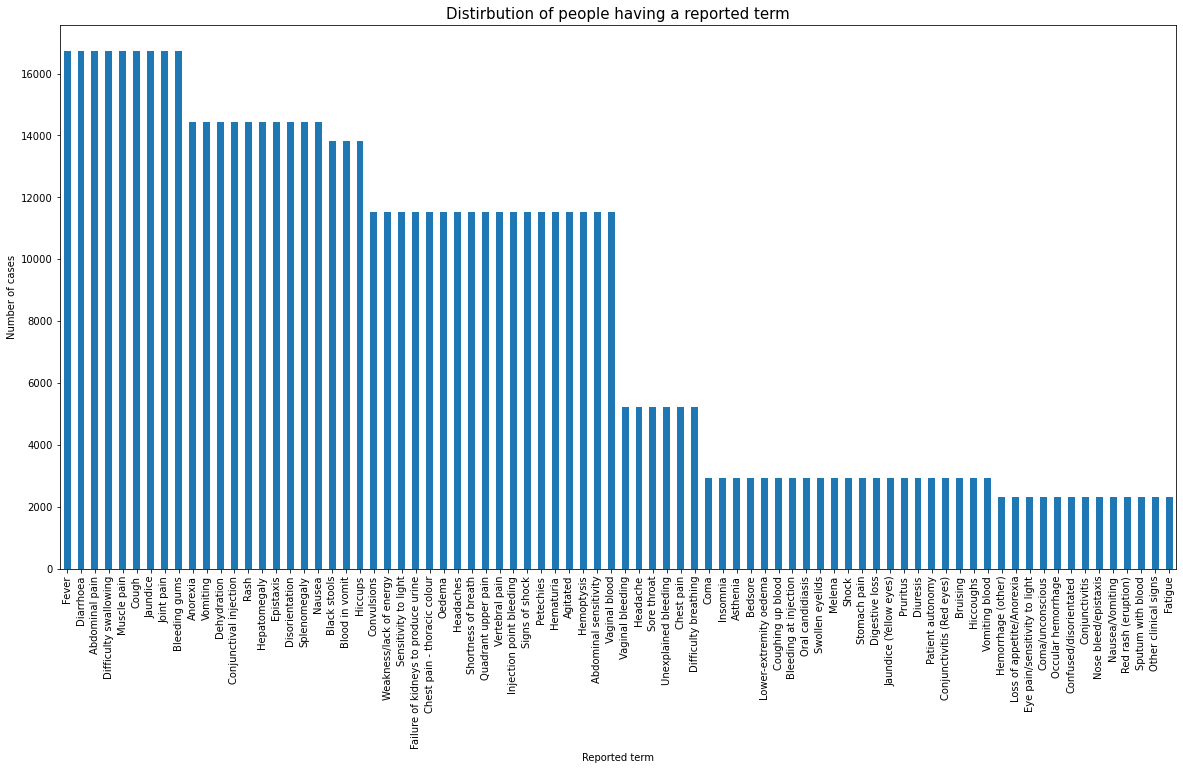

In [38]:
fig, ax = plt.subplots(figsize=(20,10))

df['SAMODIFY'].value_counts().plot(kind ="bar")

ax.set_title("Distirbution of people having a reported term",size=15)
ax.set_xlabel('Reported term')
ax.set_ylabel('Number of cases')

plt.show()

In [39]:
df_mod_term = pd.DataFrame(df.groupby(['SAMODIFY','SATERM']).USUBJID.count())
df_mod_term

USUBJID
SAMODIFY                SATERM                                         
Abdominal pain          abdopain                                  11514
                        abdopaina                                  2301
                        douleur abdominal                          2915
Abdominal sensitivity   abdosens                                  11510
Agitated                agitc                                     11511
...                                                                 ...
Vertebral pain          vertpain                                  11511
Vomiting                vomissement                                2915
                        vomit                                     11514
Vomiting blood          sang dans les vomissements(hematémèse)     2915
Weakness/lack of energy asthen                                    11516

[117 rows x 1 columns]

**Problems** :
-We have some SATERM that don't have SAMODIFY features due to the fact that they were written in UPPER case. We correct this mistake. 

-We also have some SATERM that don't have SAMODIFY features even though that corresponds to an existing one. 

-Finally we have some SAMODIFY terms that are redundant and need to be merged. 

1. If already assigned to a category SAMODIFY than assign to that category. 

These are the SATERM that don't have a SAMMODIFY feature.

In [40]:
saterm_with_no_samodify_count = df.loc[df['SAMODIFY'].isna(),'SATERM'].value_counts()
saterm_with_no_samodify_count.head()

diarrhoea    48442
headache     48030
hiccups      48003
vomiting     46565
anorexia     46117
Name: SATERM, dtype: int64

In [74]:
sum(saterm_with_no_samodify_count)

1495433

In [41]:
len(saterm_with_no_samodify_count)

461

For the same SATERM some records have a SAMODIFY feature and some don't. So we start by them and harmonize so that the same SATERM feature have the SAMODIFY feature. 

These are the SATERM for which some records have SAMODIFY and some others don't.

In [42]:
df.loc[(~df['SAMODIFY'].isna() ) & (df.SATERM.isin(saterm_with_no_samodify_count.index.values))]['SATERM'].value_counts()

cough                      11511
hiccups                    11511
coma                        2918
candidose buccale           2915
injection conjonctivale     2915
etat de choc                2915
Name: SATERM, dtype: int64

In [43]:
saterm_to_existing_samodifiy = {}

for index, row in df_mod_term.reset_index().iterrows():
    if not pd.isnull(row.SAMODIFY):
        saterm_to_existing_samodifiy[row['SATERM']] = row['SAMODIFY']

In [44]:
def saterm_to_existing_samodify(row):
    if pd.isnull(row.SAMODIFY):
        if row.SATERM in saterm_to_existing_samodifiy:
            return saterm_to_existing_samodifiy[row.SATERM]
        else: 
            return None
    else:
        return row.SAMODIFY

In [45]:
df['SAMODIFY'] = df.apply(saterm_to_existing_samodify,axis = 1)

In [46]:
df.loc[(~df['SAMODIFY'].isna() ) & (df.SATERM.isin(saterm_with_no_samodify_count.index.values))]['SATERM'].value_counts()

hiccups                    59514
cough                      49472
coma                        9463
injection conjonctivale     2938
candidose buccale           2917
etat de choc                2916
Name: SATERM, dtype: int64

2. Merge category of SAMODIFY that are equivalent

In [47]:
samodify_to_samodify = {'Jaundice (Yellow eyes)' : 'Jaundice', 'Fatigue' : 'Weakness/lack of energy',
                        'Sensitivity to light' : 'Eye pain/sensitivity to light', 'Red rash (eruption)' :'Rash',
                        'Conjunctivitis (Red eyes)' : 'Conjunctivitis','Occular hemorrhage' : 'Conjunctivitis',
                        'Conjunctival injection' : 'Conjunctivitis',
                        'Blood in vomit' : 'Hematemesis', 'Anorexia' :'Loss of appetite/Anorexia', 
                        'Nausea' : 'Nausea/Vomiting', 'Vomiting' : 'Nausea/Vomiting',
                        'Bleeding at injection' : 'Injection point bleeding', 'Signs of shock' : 'Shock' ,
                        'Disorientation' : 'Confused/disorientated', 'Coma' : 'Coma/unconscious',
                        'Vaginal blood' : 'Vaginal bleeding', 'Hiccoughs' : 'Hiccups', 
                        'Hemoptysis' : 'Hemoptysis', 'Sputum with blood' : 'Hemoptysis',
                        'Black Stools' : 'Melena', 'Black stools' : 'Melena', 'Shortness of breath' : 'Dyspnoea',
                        'Petechies' : 'Bruising', 'Asthenia' : 'Weakness/lack of energy', 
                        'Muscle pain' : 'Myalgia', 'Joint pain' : 'Arthralgia',
                        'Quadrant upper pain' : 'Abdominal pain', 'Agitated' : 'Agitation',
                        'Chest pain - thoracic colour' : 'Chest pain', 'Coughing up blood' : 'Hemoptysis',
                        'Difficulty breathing' : 'Dyspnoea', 'Difficulty swallowing' : 'Dysphagia',
                        'Failure of kidneys to produce urine' : 'Anuria', 'Headaches' : 'Headache',
                        'Lower-extremity oedema' : 'Oedema', 'No symptoms' : 'Asymptomatic',
                        'Stomach pain' : 'Abdominal pain', 'Hemorrhage (other)' : 'Unexplained bleeding',
                        'Vomiting blood' : 'Hematemesis'
                       }

In [48]:
df_samodfiy_merged = pd.DataFrame(samodify_to_samodify.items(), columns=['Old_SAMODIFY', 'Merged_with_SAMODIFY'])
df_samodfiy_merged

,Old_SAMODIFY,Merged_with_SAMODIFY
0,Jaundice (Yellow eyes),Jaundice
1,Fatigue,Weakness/lack of energy
2,Sensitivity to light,Eye pain/sensitivity to light
3,Red rash (eruption),Rash
4,Conjunctivitis (Red eyes),Conjunctivitis
5,Occular hemorrhage,Conjunctivitis
6,Conjunctival injection,Conjunctivitis
7,Blood in vomit,Hematemesis
8,Anorexia,Loss of appetite/Anorexia
9,Nausea,Nausea/Vomiting


In [49]:
def correct_samodify(row):
    if row.SAMODIFY in samodify_to_samodify:
        return samodify_to_samodify[row.SAMODIFY]
    else:
        return row.SAMODIFY

In [50]:
df['SAMODIFY'] = df.apply(correct_samodify,axis = 1)

In [51]:
len(df['SAMODIFY'].value_counts())

51

In [52]:
df['SAMODIFY'].value_counts().head(60)

Hiccups                          64730
Cough                            54688
Abdominal pain                   31157
Nausea/Vomiting                  31156
Conjunctivitis                   21968
Jaundice                         19642
Fever                            16735
Weakness/lack of energy          16732
Diarrhoea                        16731
Loss of appetite/Anorexia        16730
Dysphagia                        16729
Chest pain                       16729
Headache                         16729
Myalgia                          16728
Dyspnoea                         16728
Rash                             16728
Confused/disorientated           16727
Hemoptysis                       16727
Hematemesis                      16727
Bleeding gums                    16727
Melena                           16727
Arthralgia                       16727
Vaginal bleeding                 16726
Oedema                           14428
Dehydration                      14428
Shock                    

In [53]:
saterm_with_no_samodify_count[240:280]

stomach ulcers                                                     1
pustular skin,eruption,buttock thigh,itchy,since                   1
bosin hernia                                                       1
bruises on hands and legs                                          1
stomach ulcer. simetadine                                          1
side pain and back pain                                            1
lethargy                                                           1
dizziness                                                          1
candidose anale                                                    1
seizure                                                            1
plainte des jambes                                                 1
swollen needs                                                      1
chest burn/tongue protrus                                          1
pneumonia                                                          1
splenomegaly, anuria              

In [54]:
#Categories added : Evd, Blood clotting, Asymptomatic, Tremors, Meningeal
# Hepatosplenomegaly, Confirmed evd, Evd vaccine trial, 
# done until 240 SATERM

self_saterm_to_samodifiy = {'diarrhoea' : 'Diarrhoea', 'headache' : 'Headache', 'vomiting' : 'Nausea/Vomiting',
                           'anorexia' : 'Loss of appetite/Anorexia', 'nausea' : 'Nausea/Vomiting', 'jaundice' : 'Jaundice', 
                           'red eyes' : 'Conjunctivitis', 'stomach pain' : 'Abdominal pain',
                           'chest pain' : 'Chest pain', 'fever' : 'Fever', 'bleeding from gums' : 'Bleeding gums',
                           'difficulty swallowing' : 'Dysphagia', 'vaginal bleeding (non-menstrual)' : 'Vaginal bleeding',
                           'bleeding from injection site' : 'Injection point bleeding', 'sore throat' :'Sore throat',
                           'back pain' : 'Vertebral pain', 'skin rash' : 'Rash', 'coughing blood (hemoptysis)' : 'Hemoptysis',
                            'bruising of skin (petechiae/ ecchymosis)' :'Bruising', 'bloody or black stools (melena)' : 'Melena',
                            'blood in urine (hematuria)' : 'Hematuria', 'fresh blood in vomit (hematemesis)' : 'Hematemesis',
                            'nose bleed (epistaxis)' : 'Epistaxis', 'coughing blood (hemoptysis)' : 'Hemoptysis',
                            'anuria' : 'Anuria', 'de-hydration' : 'Dehydration', 'joint pain (arthralgia)' : 'Arthralgia',
                            'pain behind eyes/ sensitive to light' : 'Eye pain/sensitivity to light', 'spleno-megaly' : 'Splenomegaly',
                            'ruq pain' : 'Abdominal pain', 'hepato-megaly' : 'Hepatomegaly', 'tender abdomen' : 'Abdominal sensitivity',
                            'muscle pain (myalgia)' : 'Myalgia', 'confused / disoriented' : 'Confused/disorientated',
                            'difficulty breathing (dyspnoea)' : 'Dyspnoea', 'weakness' : 'Weakness/lack of energy',
                            'bone/muscle/joint pain' : 'Myalgia/Arthralgia', 'bleeding from any site':'Unexplained bleeding',
                            'swallowing problems' : 'Dysphagia', 'breathlessness' : 'Dyspnoea',
                            'non hemorrhagic rash' : 'Rash', 'abdominal pain' : 'Abdominal pain', 'joint pain' :'Arthralgia',
                            'muscle pain' : 'Myalgia', 'other symptoms' : 'Other clinical signs', 'patient eating' : 'Patient autonomy',
                            'rash' : 'Rash', 'blood in urine' : 'Hematuria' , 'evd' : 'Evd', 'conjunctivitis' : 'Conjunctivitis',
                            'bloody diarrhoea':'Melena', 'bloody vomit' : 'Hematemesis','coma' : 'Coma/unconscious',
                            'bloody cough' : 'Hemoptysis', 'fatigue' : 'Weakness/lack of energy', 'vaginal bleeding' : 'Vaginal bleeding',
                            'nasal bleeding' : 'Epistaxis', 'disorientation/confused' : 'Confused/disorientated',
                            'pain behind eye' : 'Eye pain/sensitivity to light', 'coma/unconscious' : 'Coma/unconscious',
                            'bruising' : 'Bruising', 'blood clotting' : 'Blood clotting', 'no symptoms' : 'Asymptomatic',
                            'kidney dysfunction' : 'Other clinical signs', 'bleeding' : 'Unexplained bleeding',
                            'confused':'Confused/disorientated', 'breathing difficulties': 'Dyspnoea',
                            'throat pain' : 'Sore throat', 'eyepain': 'Eye pain/sensitivity to light',
                            'dehydration' : 'Dehydration', 'epistaxis' : 'Epistaxis', 'oedema': 'Oedema',
                            'tremors' : 'Tremors', 'hematuria' : 'Hematuria', 'hematemesis' : 'Hematemesis',
                            'abdominal tenderness' : 'Abdominal sensitivity', 'encephalitic signs' : 'Other clinical signs',
                            'hemoptysis':'Hemoptysis', 'melena':'Melena', 'hepato-splenomegaly' : 'Hepatosplenomegaly',
                            'bloody stools' : 'Melena', 'oral candidiasis' : 'Oral candidiasis', 'myalgia' : 'Myalgia',
                            'gingival bleeding' : 'Bleeding gums' , 'meningeal signs' : 'Meningeal',
                            'convulsions' : 'Convulsions', 'any bleeding signs' : 'Unexplained bleeding',
                            'injection site bleeding' : 'Injection point bleeding', 'blood in stool' : 'Melena',
                            'asthenia/weakness' : 'Weakness/lack of energy', 'haemorrhagic eyes' : 'Conjunctivitis',
                            'digested blood in vomit' : 'Hematemesis', 'loss of appetite' : 'Loss of appetite/Anorexia',
                            'skin bleeding' : 'Bruising', 'black vomit' : 'Hematemesis', 'bleeding from nose' : 'Epistaxis',
                            'haemorrage eyes' : 'Conjunctivitis', 'confirmed evd' : 'Confirmed evd', 'blood in vomit' : 'Hematemesis',
                            'other bleeding' : 'Unexplained bleeding', 'other haemorrhage' : 'Unexplained bleeding', 
                            'pain behind the eyes' : 'Eye pain/sensitivity to light', 'confused disoriented' : 'Confused/disorientated',
                            'unexplained bleeding' : 'Unexplained bleeding', 'conjuntivitis' : 'Conjunctivitis', 
                            'vomiting/ nausea' : 'Nausea/Vomiting', 'difficulty breathing' :'Dyspnoea',
                            'patient walking' : 'Patient autonomy', 'previous confirmed evd test result' : 'Confirmed evd',
                            'patient enrolled in nih evd vaccine trial' : 'Evd vaccine trial', 'confusion' : 'Confused/disorientated',
                            'bleeding nose' : 'Epistaxis', 'fresh blood in vomit' : 'Hematemesis',
                            'photophobia' : 'Eye pain/sensitivity to light', 'bruising of skin' : 'Bruising',
                            'additional medical problems' : 'Other clinical signs', 'lombalgie (rhumatologie)' : 'Vertebral pain',
                            'tremblements (neurologie)' : 'Tremors', 'allergies' : 'Other clinical signs', 
                            'injection conjonctivale' : 'Conjunctivitis', 'joint or muscle pain/aches' : 'Myalgia/Arthralgia',
                            'hiccups/hiccoughs' : 'Hiccups', 'fatigue/asthenia' : 'Weakness/lack of energy', 
                            'breathing difficulty' : 'Dyspnoea', 'myalgie' : 'Myalgia',
                            'difficulty sleeping' : 'Insomnia', 'hair loss' : 'Other clinical signs',
                            'loss of vision' : 'Other clinical signs',  'swellingof ankles or legs' : 'Other clinical signs',
                            'loss of hearing': 'Other clinical signs', 'diarrhoea/loose stools' : 'Diarrhoea' , 
                            'ringing in ears' : 'Other clinical signs', 'weight loss' : 'Weight loss',
                            'eye pain' : 'Eye pain/sensitivity to light', 'tb' : 'Other clinical signs',
                            'vertige (neurologie)' : 'Other clinical signs', 'arthralgie' : 'Arthralgia',
                            'dyspnée (cardiologie)' : 'Dyspnoea',  'anxiété (psychiatrie)' : 'Agitation',
                            'b/feeding' : 'Other clinical signs', 'rhum' : 'Other clinical signs', 'ulcer' : 'Other clinical signs',
                            'agitation (psychiatrie)' : 'Agitation', 'cervicalgie (rhumatologie)' : 'Vertebral pain',
                            'douleur mictionnelle' : 'Other clinical signs', 'dysphagie (hépato / gastro / entérologie)' : 'Dysphagia',
                            'line/venepuncture/injection site' : 'Other clinical signs','epistaxis/nose bleeding' : 'Epistaxis', 
                            'gingival/oral bleeding' : 'Bleeding gums','vaginal (non-menstrual)' : 'Vaginal bleeding', 
                            'fresh red blood in vomit' : 'Hematemesis', 'hernia' : 'Other clinical signs', 
                            'epigastralgie' : 'Abdominal pain', 'déshydratation (urologie / néphrologie)' : 'Dehydration',
                            'somnolence (neurologie)' : 'Weakness/lack of energy','coughing up blood' : 'Hemoptysis',
                            'melena blood in stool (tar black)' : 'Melena', 'bleeding site-mouth' : 'Bleeding gums',
                            'chloroquine' : 'Other clinical signs', 'polypneu' : 'Other clinical signs',
                            'hiv' : 'Other clinical signs' , 'constipation (hépato / gastro / entérologie)' : 'Other clinical signs',
                            'peptic ulcer' : 'Other clinical signs', 'peptic ulcer' : 'Other clinical signs',
                            'polyurie (urologie / néphrologie)' : 'Other clinical signs', 'convulsion' : 'Convulsions',
                            'oedeme des membres inferieurs' : 'Oedema', 'leucorrhee' : 'Other clinical signs',
                            'arthragie' : 'Arthralgia', 'pâleur (hémato / cancérologie)' : 'Other clinical signs',
                            'dyspnée (pneumologie)' : 'Dyspnoea', 'douleur mammaire' : 'Other clinical signs',
                            'constipation' : 'Other clinical signs', 'polydipsie (urologie / néphrologie)' : 'Other clinical signs',
                            'langue chargee' : 'Other clinical signs', 'side pain': 'Other clinical signs', 
                            'do not meet case definition' : 'Other clinical signs',
                            'ballonnement abdominal (hépato / gastro / entérologie)' : 'Other clinical signs',
                            'sore mouth' : 'Other clinical signs', 'tuberculosis' : 'Other clinical signs', 
                            'anxiãâ©tãâ©' : 'Other clinical signs', 'torticolis' : 'Other clinical signs',
                            'hyperthermie' : 'Other clinical signs', 'gemissement' : 'Other clinical signs',
                            'splenomegalie v' : 'Splenomegaly', 'bavure mousseuse' : 'Other clinical signs',
                            'gastric ulcer' : 'Other clinical signs', 'gargouillement abdominal' : 'Other clinical signs',
                            'known hiv patient' : 'Other clinical signs', 'chloroform' :'Other clinical signs',
                            'dãâ©mangeaison' : 'Pruritus', 'anurie (urologie / néphrologie)' : 'Anuria',
                            'hypertension' : 'Other clinical signs', 'diabetes' : 'Other clinical signs',
                            'amaigrissement' : 'Weight loss', 'douleur dentaire' : 'Other clinical signs', 
                            'dorsalgie (rhumatologie)' : 'Vertebral pain', 'trembling' : 'Tremors',
                            'tuméfaction (rhumatologie)' : 'Other clinical signs', 'œdème (cardiologie)' : 'Oedema',
                            'candidose buccale' : 'Oral candidiasis', 'evd complications' : 'Evd', 
                            'douleur vertãâ©brale' : 'Vertebral pain', 'trouble visuel' : 'Other clinical signs',
                            'langue changee' : 'Other clinical signs', 'sickler ' : 'Other clinical signs',
                            'dasability,hernia,poss strock' : 'Other clinical signs', 'uknw' : 'Other clinical signs',  
                            'stiffness and pain of both knees, starting 2 weeks after discharge. pain and secretion r eye 2 wks after discharge' : 'Other clinical signs',
                            'dysentry bloody' : 'Melena',  'seizure' : 'Other clinical signs', 'bitting her arm,numb body' : 'Other clinical signs',
                            'transpiration' : 'Other clinical signs','douleur abdominale (hépato / gastro / entérologie)' : 'Abdominal pain',
                            'painful knee joints' : 'Arthralgia', 'stomach ulcer' : 'Other clinical signs', 'dysphonie (oto / rhino / laryngologie)' : 'Other clinical signs',
                            'selles glaireuses' : 'Other clinical signs', 'menstruation' : 'Other clinical signs', 
                            'chills, leg pain, tendern' : 'Other clinical signs','paracetamol and tatracyline' : 'Other clinical signs', 'extremites fraiches' : 'Other clinical signs',
                            'headache, malaria' : 'Headache', 'douleur lombaire' : 'Other clinical signs', 'hypertension; petric uler disease' : 'Other clinical signs',
                            'plaie lineaire' : 'Other clinical signs', '?? abortion (amenoria)' : 'Other clinical signs', 'athralgia knees bilaterally' : 'Arthralgia',
                            'very critical/ convulsing' : 'Convulsions', 'general weakness, headaches, feeling feverish all over the last 2 month' : 'Weakness/lack of energy', 
                            'adb pain' : 'Abdominal pain', 'unconscious' : 'Coma/unconscious', 'confirmed hiv on the 21/4/2015' : 'Other clinical signs',
                            'plainte des jambes' : 'Other clinical signs', 'tremor; agitation' : 'Tremors', 'iburofen' : 'Other clinical signs', 'normal menstruation': 'Other clinical signs',
                            'hypertension/fungi infection' : 'Other clinical signs'
                           }

In [55]:
def saterm_to_samodify(row):
    if pd.isnull(row.SAMODIFY):
        if row.SATERM in self_saterm_to_samodifiy:
            return self_saterm_to_samodifiy[row.SATERM]
        else: 
            return None
    else:
        return row.SAMODIFY

In [56]:
df['SAMODIFY'] = df.apply(saterm_to_samodify,axis = 1)

In [57]:
df['SAMODIFY'].isna().sum() / len(df)

0.01854528495510693

In [58]:
len(df['SAMODIFY'].value_counts())

61

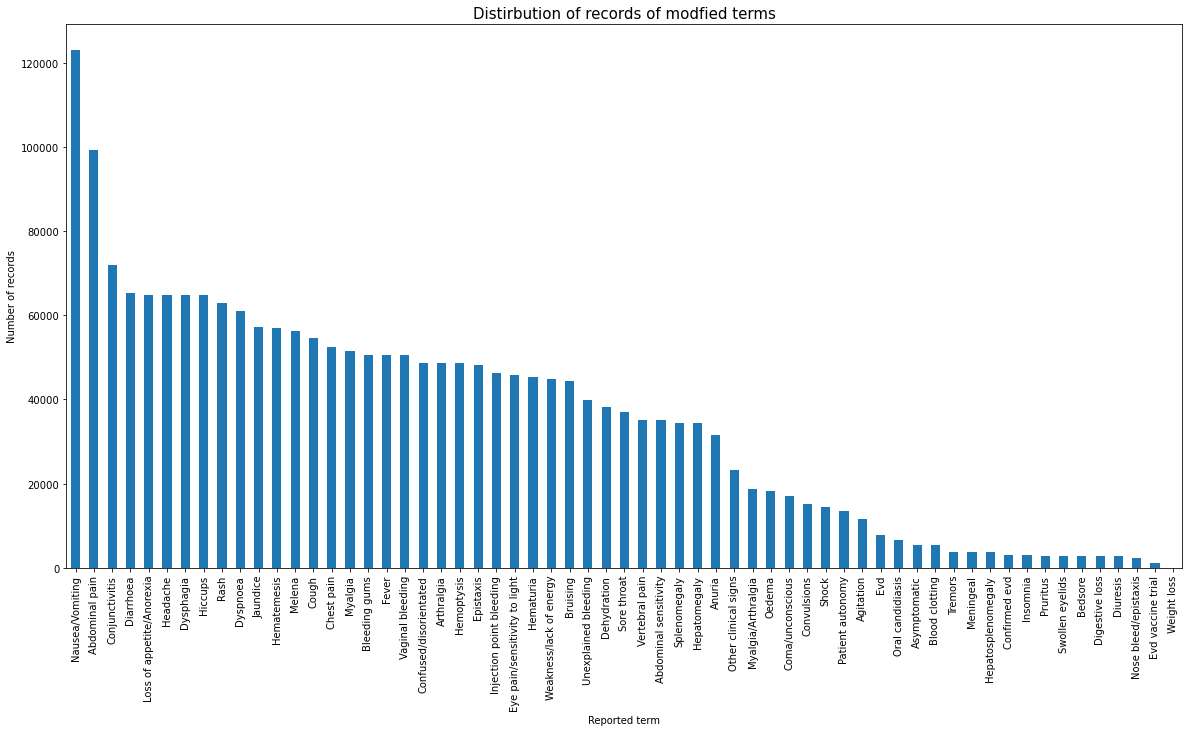

In [59]:
fig, ax = plt.subplots(figsize=(20,10))

df['SAMODIFY'].value_counts().plot(kind ="bar")

ax.set_title("Distirbution of records of modfied terms",size=15)
ax.set_xlabel('Reported term')
ax.set_ylabel('Number of records')

plt.show()

In [60]:
df_samodify_stdy = df.groupby(['SAMODIFY','STUDYID']).USUBJID.nunique().unstack(fill_value=0)
df_samodify_stdy['Total'] = df_samodify_stdy.apply(sum,axis=1)
df_samodify_stdy.sort_values(by = 'Total', ascending = False, inplace= True)
total_samodify = sum(df_samodify_stdy['Total'])
df_samodify_stdy['Percentage'] = df_samodify_stdy['Total'] / total_samodify
df_samodify_stdy

STUDYID,EJPDEJ,EOPNOJ,EORKWS,EQJJGF,ERFCVU,EUZJTB,Total,Percentage
SAMODIFY,,,,,,,,
Abdominal pain,2301,147,17,1909,2717,1872,8963,0.030930
Diarrhoea,2301,147,17,1909,2717,1872,8963,0.030930
Headache,2301,147,17,1909,2717,1872,8963,0.030930
Dysphagia,2301,147,17,1909,2717,1872,8963,0.030930
Loss of appetite/Anorexia,2301,147,17,1909,2717,1872,8963,0.030930
...,...,...,...,...,...,...,...,...
Bedsore,0,147,0,0,0,0,147,0.000507
Digestive loss,0,147,0,0,0,0,147,0.000507
Swollen eyelids,0,147,0,0,0,0,147,0.000507


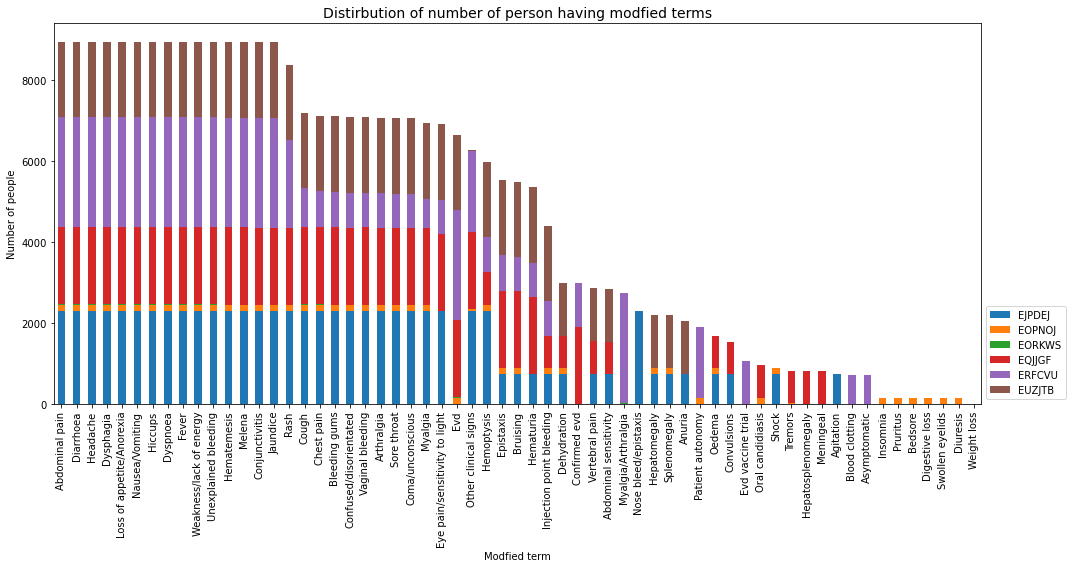

In [61]:
fig, ax = plt.subplots(figsize=(15,8))

df_samodify_stdy.drop(columns=['Total', 'Percentage']).plot(kind='bar',stacked=True, ax=ax)

plt.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.set_title("Distirbution of number of person having modfied terms",size=14)
ax.set_xlabel('Modfied term')
ax.set_ylabel('Number of people')

fig.tight_layout()
plt.savefig('Samodify.png', dpi=300)

plt.show()

In [62]:
df_samodify_saterm_stdy = df.groupby(['SAMODIFY','SATERM','STUDYID']).USUBJID.nunique().unstack(fill_value=0)
df_samodify_saterm_stdy['Total_SATERM'] = df_samodify_saterm_stdy.apply(sum,axis=1)
df_samodify_saterm_stdy = df_samodify_saterm_stdy.join(df.groupby('SAMODIFY').USUBJID.nunique(), on=['SAMODIFY'], how = 'inner')
df_samodify_saterm_stdy.rename(columns={"USUBJID": "Total_SAMODIFY"},inplace = True)
pd.set_option("max_rows", None)
df_samodify_saterm_stdy

EJPDEJ  \
SAMODIFY                      SATERM                                                       
Abdominal pain                abdominal pain                                           0   
                              abdopain                                               730   
                              abdopaina                                             2301   
                              adb pain                                                 0   
                              douleur abdominal                                        0   
                              douleur abdominale (hépato / gastro / entérologie)       0   
                              douleur d'estomac (epigastralgie)                        0   
                              doulqs                                                 730   
                              epigastralgie                                            0   
                              ruq pain                                                 0   
                              stomach pain                                             0   
Abdominal sensitivity         abdominal tenderness                                     0   
                              abdosens                                               730   
                              tender abdomen                                           0   
Agitation                     agitation (psychiatrie)                                  0   
                              agitc                                                  730   
                              anxiété (psychiatrie)                                    0   
Anuria                        anurc                                                  730   
                              anuria                                                   0   
                              anurie (urologie / néphrologie)                          0   
Arthralgia                    arthragie                                                0   
                              arthralc                                               730   
                              arthralgie                                               0   
                              athralgia knees bilaterally                              0   
                              douleur articulaire                                      0   
                              joint pain                                               0   
                              joint pain (arthralgia)                                  0   
                              jointpaina                                            2301   
                              painful knee joints                                      0   
Asymptomatic                  no symptoms                                              0   
Bedsore                       escarre                                                  0   
Bleeding gums                 bleeding from gums                                       0   
                              bleeding site-mouth                                      0   
                              gingival bleeding                                        0   
                              gingival/oral bleeding                                   0   
                              gum                                                    730   
                              gumbla                                                2301   
                              saignement des gencives (gingivorragie)                  0   
Blood clotting                blood clotting                                           0   
Bruising                      bruising                                                 0   
                              bruising of skin                                         0   
                              bruising of skin (petechiae/ ecchymosis)                 0   
                              petc

**Question** :We want to check if bruising and blood clotting are actually the same patients in the ERFCVU cohort.

In [63]:
id_blood = set(df[df['SATERM'] =='blood clotting']['USUBJID'].unique())
len(id_blood)

707

In [64]:
id_bruis = set(df[df['SATERM'] =='bruising']['USUBJID'].unique())
len(id_bruis)

708

In [65]:
len(id_bruis.intersection(id_blood))

707

In [66]:
samodify_to_samodify['Blood clotting'] = 'Bruising'

**Answer**  : Yes they are ! 

In [67]:
df['SAMODIFY'] = df.apply(correct_samodify,axis = 1)

### Study Day of Observation/Collection

This variable describes the study day of the observation relative to the date in **RFSTDTC**. Problem of negative values=> Ask IDDO ! 

RFSTDTC is the **Reference Start Date/Time** : Describes the date and time of the start of the Subject Reference Period. The Subject Reference Period is defined by IDDO as starting with the subject's first study encounter and ending with the subject's final study encounter. 

RFSTDTC corresponds with the time and date of the subject's first study encounter (e.g., screening, enrollment, admission). This date will be used to calculate the relative days in the --DY​, --STDY, --ENDY variables.  This date and time will be provided in ISO 8601 format. This variable will be blank for submissions that do not provide this initial date. All of the derived variables will also be blank since they are all calculated based on RFSTDTC.

In [68]:
sum(df['SADY'].isna()) / len(df)

0.0028426572552996774

We almost have the date for the records. 

In [69]:
df_sady_obsv_per_stdy = df.groupby(['SADY','STUDYID']).USUBJID.count().unstack(fill_value=0)
df_sady_obsv_per_stdy

STUDYID,EJPDEJ,EOPNOJ,EORKWS,EQJJGF,ERFCVU,EUZJTB
SADY,,,,,,
-78563.0,0,0,0,36,0,0
-78544.0,0,0,0,72,0,0
-78540.0,0,0,0,36,0,0
-78524.0,0,0,0,36,0,0
-78523.0,0,0,0,36,0,0
-78514.0,0,0,0,36,0,0
-78487.0,0,0,0,36,0,0
-78480.0,0,0,0,36,0,0
-78473.0,0,0,0,36,0,0


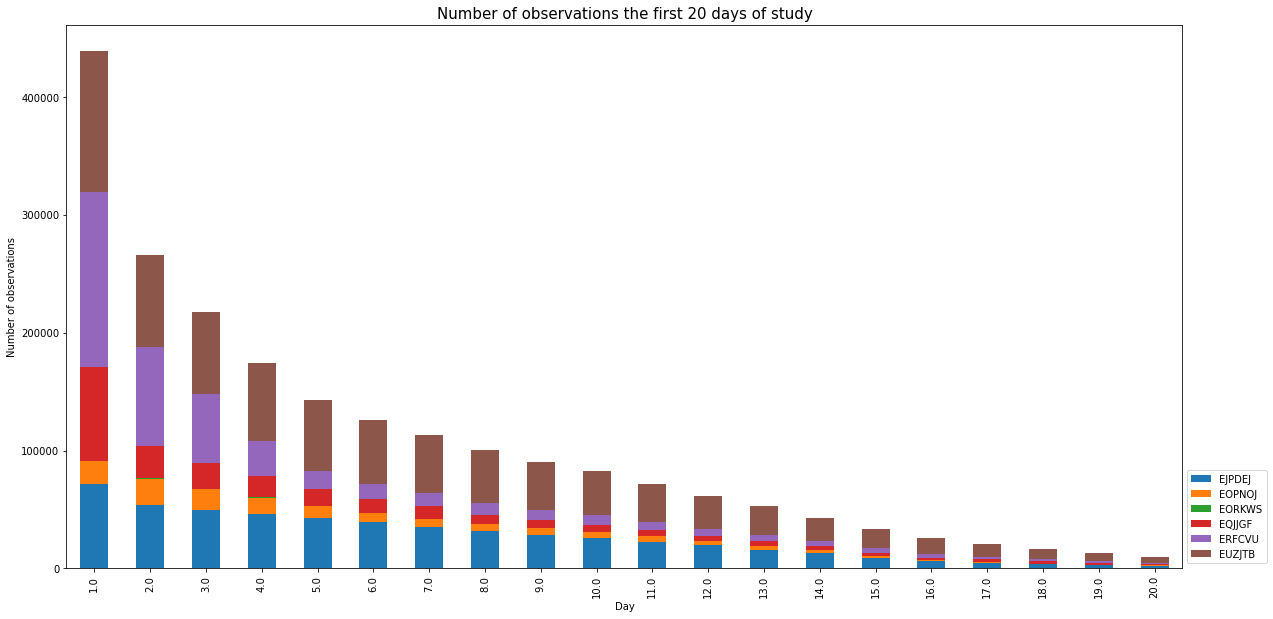

In [70]:
fig, ax = plt.subplots(figsize=(20,10))

df_sady_obsv_per_stdy.loc[1:20].plot(kind ="bar",stacked=True, ax=ax)

plt.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.set_title("Number of observations the first 20 days of study",size=15)
ax.set_xlabel('Day')
ax.set_ylabel('Number of observations')

plt.show()

In [71]:
df_sady_people_per_stdy = df.groupby(['SADY','STUDYID']).USUBJID.nunique().unstack(fill_value=0)
df_sady_people_per_stdy

STUDYID,EJPDEJ,EOPNOJ,EORKWS,EQJJGF,ERFCVU,EUZJTB
SADY,,,,,,
-78563.0,0,0,0,1,0,0
-78544.0,0,0,0,2,0,0
-78540.0,0,0,0,1,0,0
-78524.0,0,0,0,1,0,0
-78523.0,0,0,0,1,0,0
-78514.0,0,0,0,1,0,0
-78487.0,0,0,0,1,0,0
-78480.0,0,0,0,1,0,0
-78473.0,0,0,0,1,0,0


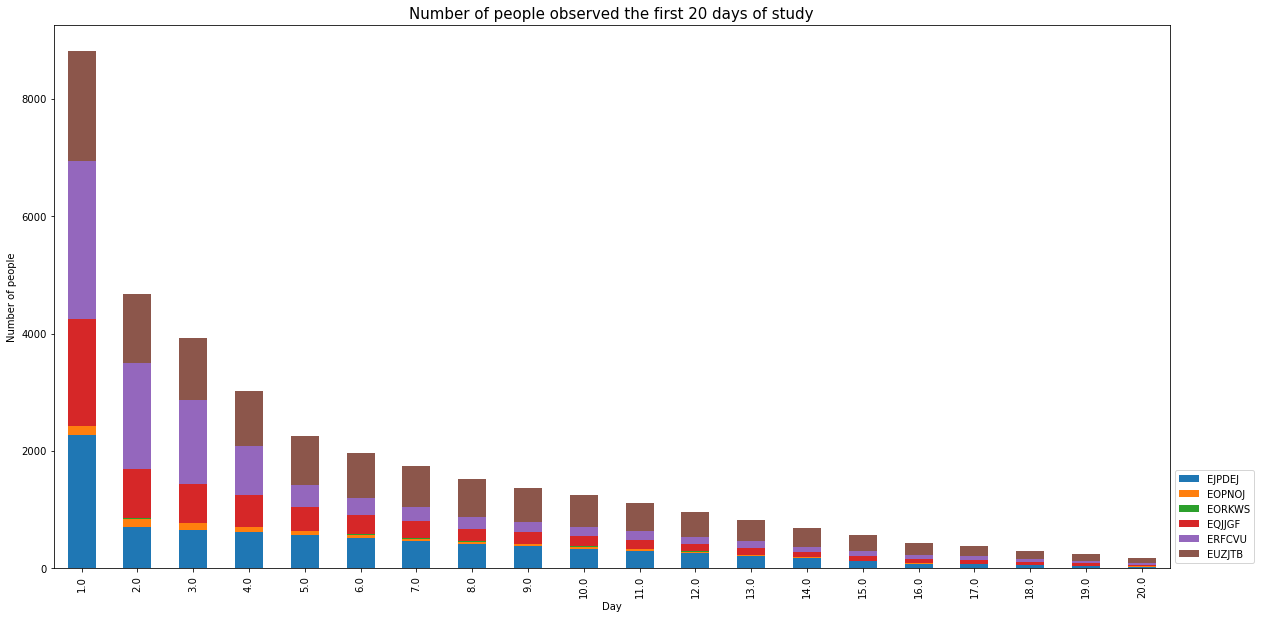

In [72]:
fig, ax = plt.subplots(figsize=(20,10))

df_sady_people_per_stdy.loc[1:20].plot(kind ="bar",stacked=True, ax=ax)

plt.legend(loc="lower left", bbox_to_anchor=(1,0))
ax.set_title("Number of people observed the first 20 days of study",size=15)
ax.set_xlabel('Day')
ax.set_ylabel('Number of people')

plt.show()

In [73]:
df.groupby(['SADY','SAMODIFY']).USUBJID.nunique().unstack(fill_value=0)

SAMODIFY,Abdominal pain,Abdominal sensitivity,Agitation,Anuria,Arthralgia,Asymptomatic,Bedsore,Bleeding gums,Bruising,Chest pain,...,Shock,Sore throat,Splenomegaly,Swollen eyelids,Tremors,Unexplained bleeding,Vaginal bleeding,Vertebral pain,Weakness/lack of energy,Weight loss
SADY,,,,,,,,,,,,,,,,,,,,,
-78563.0,1,0,0,0,1,0,0,1,1,1,...,0,1,0,0,0,1,1,0,1,0
-78544.0,2,0,0,0,2,0,0,2,2,2,...,0,2,0,0,0,2,2,0,2,0
-78540.0,1,0,0,0,1,0,0,1,1,1,...,0,1,0,0,0,1,1,0,1,0
-78524.0,1,0,0,0,1,0,0,1,1,1,...,0,1,0,0,0,1,1,0,1,0
-78523.0,1,0,0,0,1,0,0,1,1,1,...,0,1,0,0,0,1,1,0,1,0
-78514.0,1,0,0,0,1,0,0,1,1,1,...,0,1,0,0,0,1,1,0,1,0
-78487.0,1,0,0,0,1,0,0,1,1,1,...,0,1,0,0,0,1,1,0,1,0
-78480.0,1,0,0,0,1,0,0,1,1,1,...,0,1,0,0,0,1,1,0,1,0
-78473.0,1,0,0,0,1,0,0,1,1,1,...,0,1,0,0,0,1,1,0,1,0
